In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando a base de dados
df = pd.read_excel("base_sintetica_dividas.xlsx")
df.head()

,idade,renda_mensal,valor_original_divida,dias_em_atraso,parcelas_em_aberto,escolaridade,estado_civil,localizacao,valor_atualizado_divida
0,56,1721.419851,5777.880011,353,9,medio,solteiro,BA,6457.74
1,69,3713.048416,4706.787595,266,32,superior,solteiro,PR,5124.12
2,46,3948.681325,5199.287281,421,5,pos-graduacao,casado,BA,5928.92
3,32,2288.732737,6543.393583,270,3,medio,casado,BA,7132.30
4,60,1842.342064,3700.067418,395,17,medio,divorciado,RS,4187.24


In [3]:
# Informacoes iniciais
print("Resumo do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

Resumo do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    10000 non-null  int64  
 1   renda_mensal             10000 non-null  float64
 2   valor_original_divida    10000 non-null  float64
 3   dias_em_atraso           10000 non-null  int64  
 4   parcelas_em_aberto       10000 non-null  int64  
 5   escolaridade             10000 non-null  object 
 6   estado_civil             10000 non-null  object 
 7   localizacao              10000 non-null  object 
 8   valor_atualizado_divida  10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB
None

Estatísticas descritivas:
               idade  renda_mensal  valor_original_divida  dias_em_atraso  \
count   10000.000000  10000.000000           10000.000000     10000.00000   
unique           NaN          

In [4]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
idade                      0
renda_mensal               0
valor_original_divida      0
dias_em_atraso             0
parcelas_em_aberto         0
escolaridade               0
estado_civil               0
localizacao                0
valor_atualizado_divida    0
dtype: int64


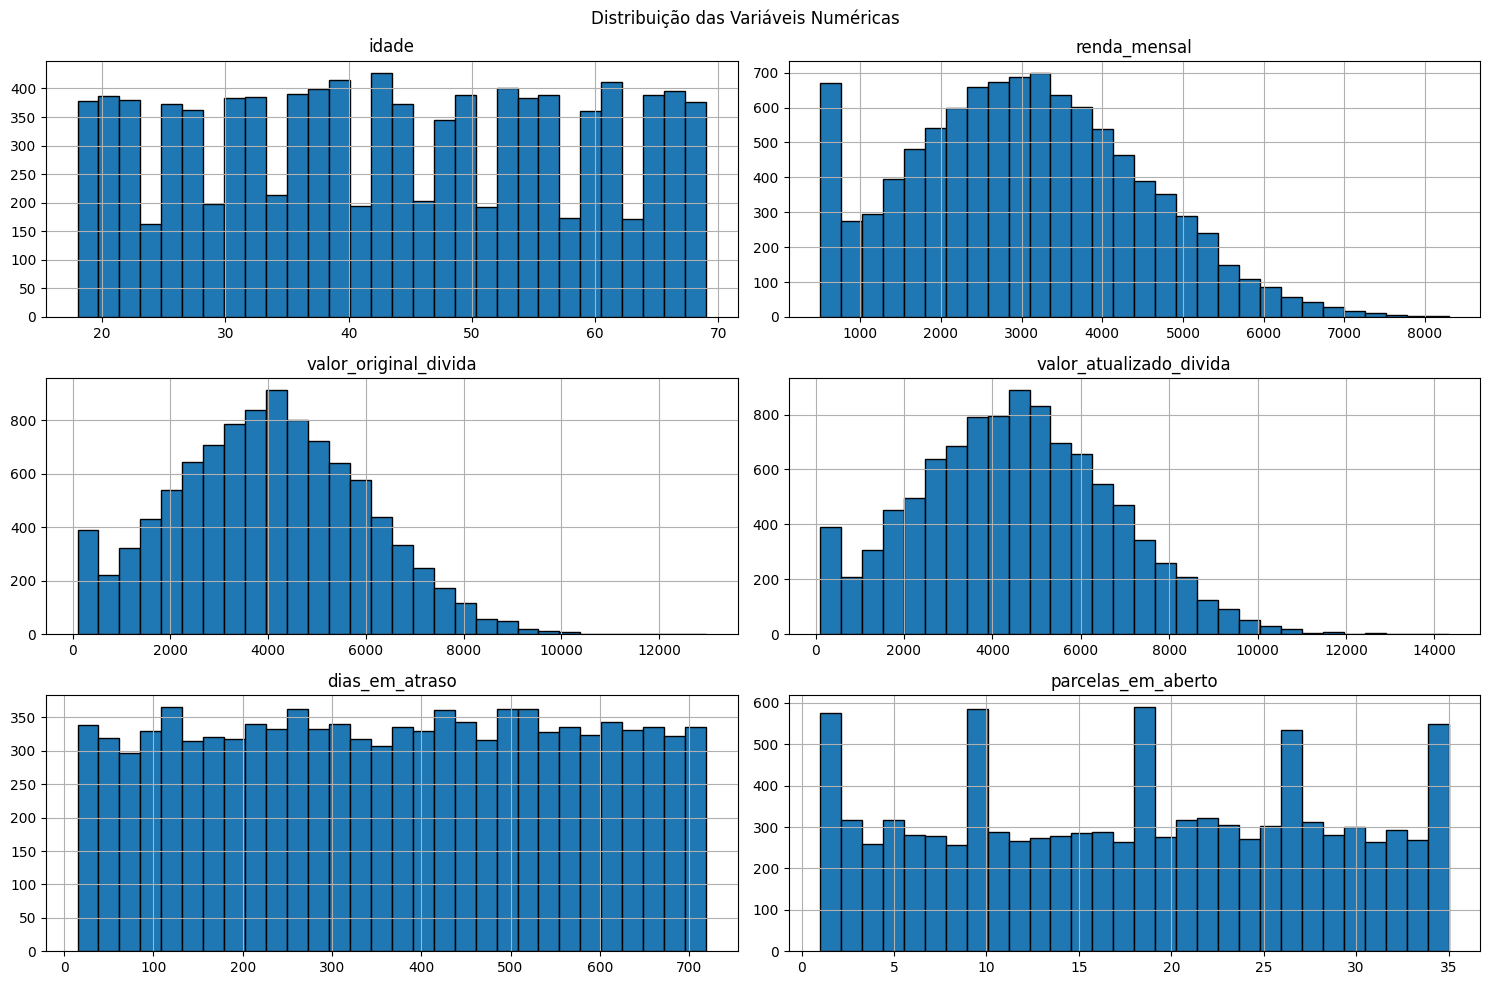

In [5]:
# Distribuição das variáveis numéricas
num_cols = ["idade", "renda_mensal", "valor_original_divida", "valor_atualizado_divida", "dias_em_atraso", "parcelas_em_aberto"]
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.tight_layout()
plt.show()

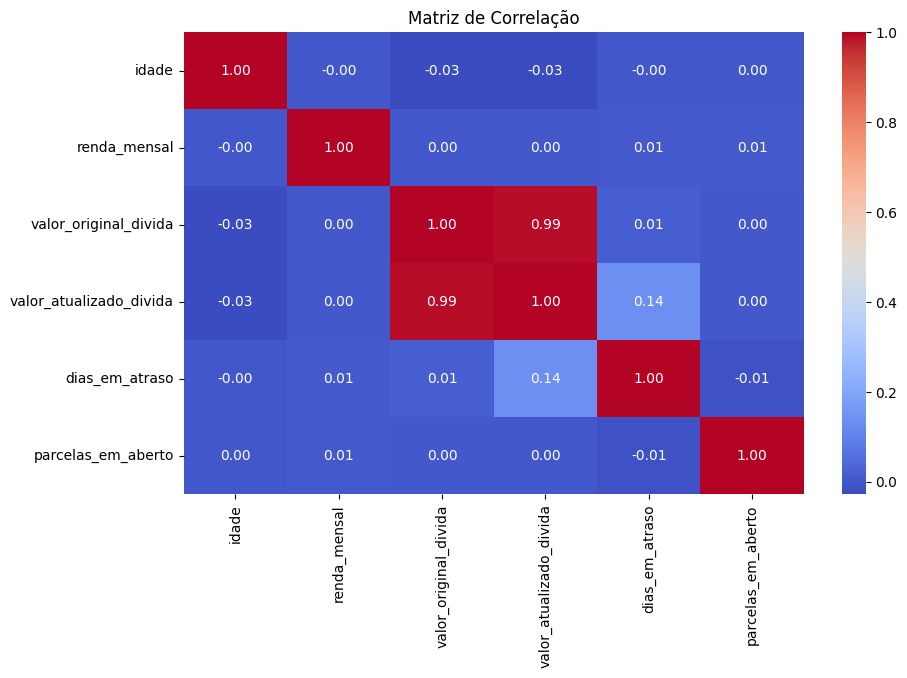

In [6]:
# Análise de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

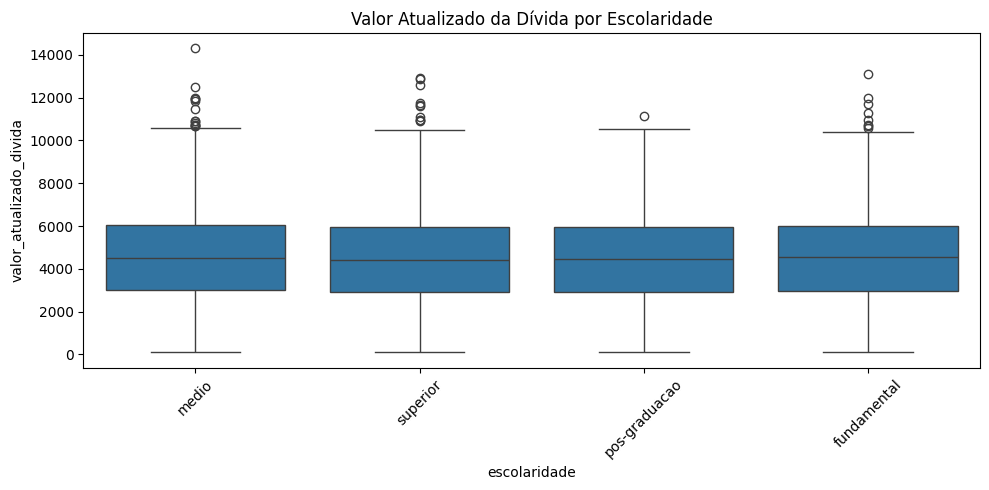

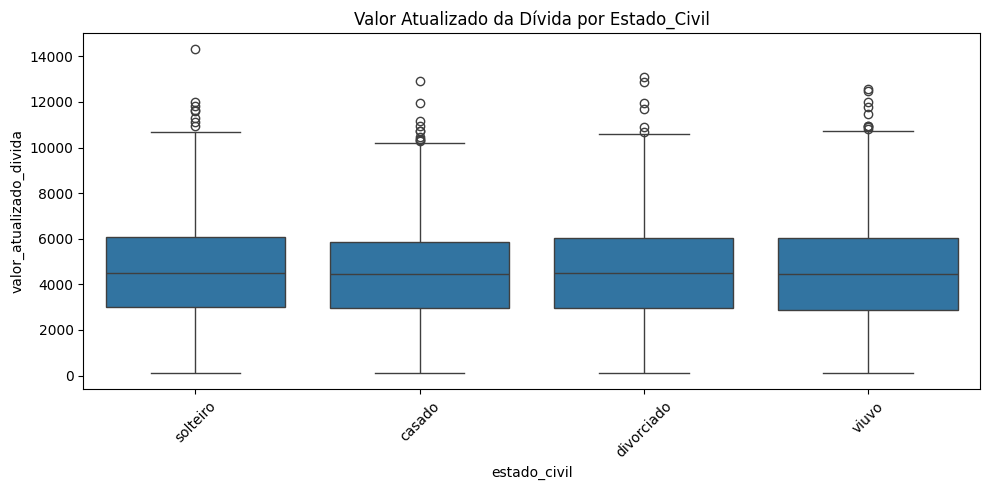

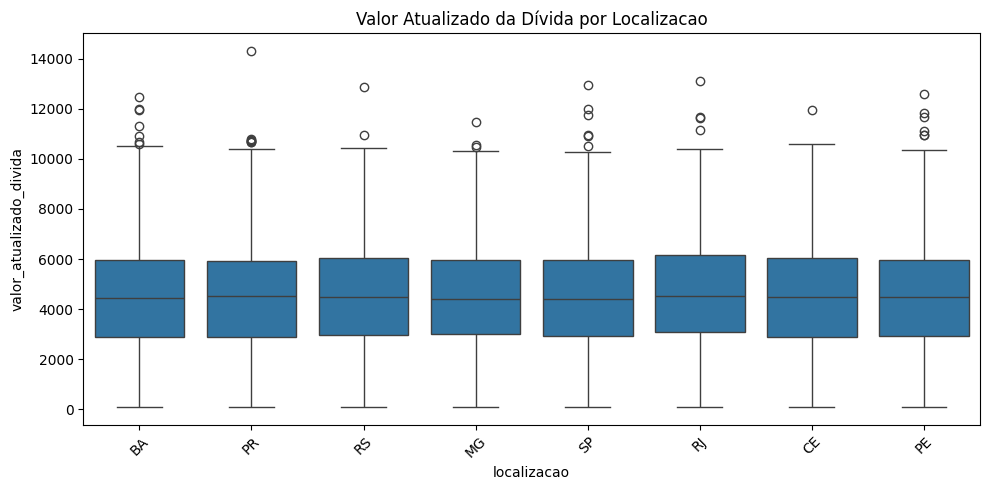

In [7]:
# Boxplots por variáveis categóricas
cat_cols = ["escolaridade", "estado_civil", "localizacao"]
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y="valor_atualizado_divida")
    plt.title(f"Valor Atualizado da Dívida por {col.title()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

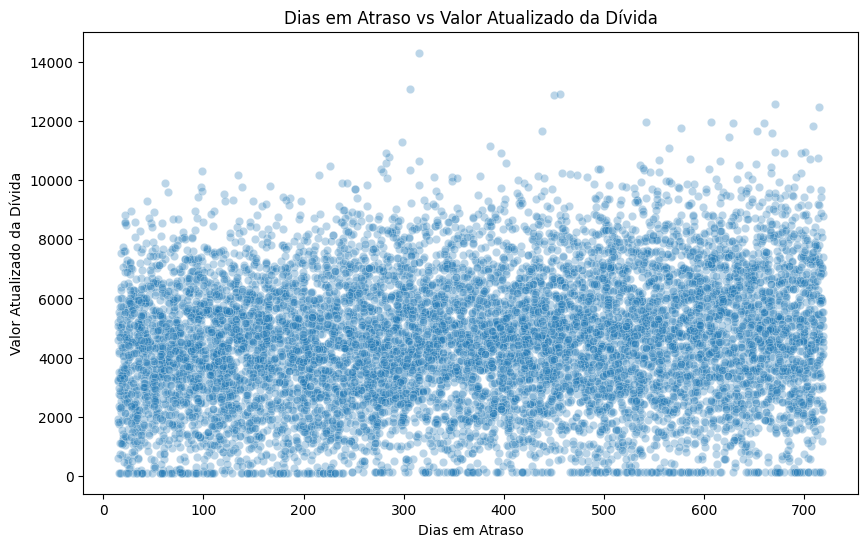

In [8]:
# Relação entre dias em atraso e valor atualizado da dívida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="dias_em_atraso", y="valor_atualizado_divida", alpha=0.3)
plt.title("Dias em Atraso vs Valor Atualizado da Dívida")
plt.xlabel("Dias em Atraso")
plt.ylabel("Valor Atualizado da Dívida")
plt.show()

In [9]:
# Análise de outliers
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

idade: 0 outliers (0.00%)
renda_mensal: 37 outliers (0.37%)
valor_original_divida: 30 outliers (0.30%)
valor_atualizado_divida: 33 outliers (0.33%)
dias_em_atraso: 0 outliers (0.00%)
parcelas_em_aberto: 0 outliers (0.00%)


In [10]:
# Teste de normalidade (Shapiro-Wilk para amostra de 500 registros)
print("\nTeste de normalidade (Shapiro-Wilk):")
for col in num_cols:
    stat, p = stats.shapiro(df[col].sample(500, random_state=42))
    normal = "sim" if p > 0.05 else "não"
    print(f"{col}: p = {p:.4f} → Distribuição normal? {normal}")


Teste de normalidade (Shapiro-Wilk):
idade: p = 0.0000 → Distribuição normal? não
renda_mensal: p = 0.0000 → Distribuição normal? não
valor_original_divida: p = 0.0024 → Distribuição normal? não
valor_atualizado_divida: p = 0.0041 → Distribuição normal? não
dias_em_atraso: p = 0.0000 → Distribuição normal? não
parcelas_em_aberto: p = 0.0000 → Distribuição normal? não
